In [0]:
## Import Packages
import tensorflow
import warnings
warnings.filterwarnings('ignore')
import h5py
from keras.datasets import mnist
from keras import optimizers
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import keras
import tempfile
import seaborn as sns
import scipy
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
## View sample data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
%matplotlib inline

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()

In [3]:
# mount your drive to use the files on your notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

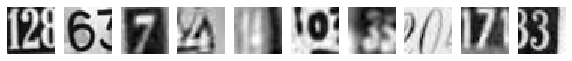

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [0]:
# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train1 = X_train / 255.0
X_test1 = X_test / 255.0

In [0]:
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

In [0]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train1[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test1[i,:].flatten())

# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train[0:2000]
y_te = y_test[0:2000]

In [0]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_tr,y_tr)
predictions = model.predict(x_te)
score = model.score(x_te, y_te)

In [11]:
print("accuracy=%.2f%%" % (score))

accuracy=0.31%


In [13]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(x_tr,y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
print(f'Model Score: {model.score(x_te, y_te)}')

y_predict = model.predict(x_te)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_te)}')

Model Score: 0.331
Confusion Matrix: 
[[89  9  7 15 15 18 24  4 27 25]
 [13 87 17 24 17 21 14 17 13 13]
 [13 18 69 19 16 16 16 35 12 22]
 [11 14 18 34 12 17 11 18 19 13]
 [16 20 17 18 95 14 20 13 16 11]
 [11 12  6 22  6 52 12  8 14 14]
 [25 14  9 14 16 19 61  7 37 22]
 [ 9  7 23 12  6  9  8 91  9 11]
 [ 8  2  6 13  5 16 17  1 29 16]
 [26  2 15 14 16 29 19 11 22 55]]


In [0]:
scaler = StandardScaler()
scaler.fit(x_tr)
x_train_scaled = scaler.transform(x_tr)
x_test_scaled = scaler.transform(x_te)


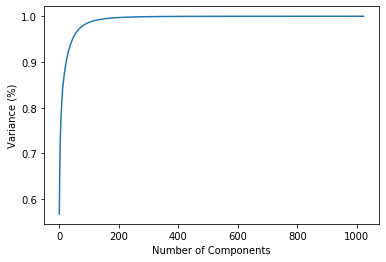

In [16]:
pca = PCA().fit(x_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [17]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(x_train_scaled, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print(f'Model Score: {model.score(x_test_scaled, y_te)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_te)}')

Model Score: 0.333
Confusion Matrix: 
[[ 83   9   5  15  11  21  21   4  26  34]
 [ 12  91  17  25  23  22  15  16  13  16]
 [ 12  12  75  19  17  20  19  41  11  18]
 [  8  10  18  40   8  15  14  23  22  14]
 [ 16  26  13   7 101  15  19  12  15  13]
 [ 15  10   5  25   5  54  12   7  14  11]
 [ 31  12  10  13  19  22  59   8  36  21]
 [  9   8  22  17   5   5   7  84   5  14]
 [  9   4   8  10   2  15  16   1  31  13]
 [ 26   3  14  14  13  22  20   9  25  48]]


In [19]:
print(classification_report(y_te, y_predict))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       221
           1       0.36      0.49      0.42       185
           2       0.31      0.40      0.35       187
           3       0.23      0.22      0.22       185
           4       0.43      0.50      0.46       204
           5       0.34      0.26      0.29       211
           6       0.26      0.29      0.27       202
           7       0.48      0.41      0.44       205
           8       0.28      0.16      0.20       198
           9       0.25      0.24      0.24       202

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



**Lets use Neural network to trail the data and see the resutls**

In [0]:
# Max pooling of 2,2 pixel i.e. taking the max from 2 col & 2 rows
# 1 layers of weights i.e. Dense Layer

num_classes = 10      # Number of classes to model
cnn = Sequential()
cnn.add(Dense(32, input_shape = (1024, )))
cnn.add(Activation('relu'))
cnn.add(Dense(32))
cnn.add(Activation('relu'))
cnn.add(Dense(32))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42000, 1024), (42000,), (18000, 1024), (18000,))

In [38]:

## Train the data using 20 epochs and batch size 128
history_cnn = cnn.fit(X_train1, y_train1,
                          batch_size=128, epochs=20, verbose=1, validation_split=.1)

scores = cnn.evaluate(X_test1, y_test1, batch_size = 128, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37800 samples, validate on 4200 samples
Epoch 1/20





37800/37800 [==============================] - 3s 75us/step - loss: 2.3039 - acc: 0.0980 - val_loss: 2.3027 - val_acc: 0.0981
Epoch 2/20
37800/37800 [==============================] - 1s 34us/step - loss: 2.3027 - acc: 0.1011 - val_loss: 2.3029 - val_acc: 0.1005
Epoch 3/20
37800/37800 [==============================] - 1s 34us/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3032 - val_acc: 0.0919
Epoch 4/20
37800/37800 [==============================] - 1s 34us/step - loss: 2.3027 - acc: 0.1013 - val_loss: 2.3031 - val_acc: 0.0979
Epoch 5/20
37800/37800 [==============================] - 1s 34us/step - loss: 2.3026 - acc: 0.1030 - val_loss: 2.3029 - val_acc: 0.0919
Epoch 6/20
37800/37800 [==============================] - 1s 33us/step - loss: 2.3026 - acc: 0.1007 - val_loss: 2.3030 - val_acc: 0.0979
Epoch 7/20
37800/37800 [===

In [47]:
result1 = cnn.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 28us/step


In [48]:
print('Test accuracy: ', result1[1])

Test accuracy:  0.0955


In [49]:
class_prediction =cnn.predict_classes(X_test,batch_size=128,verbose=True)

18000/18000 [==============================] - 0s 12us/step


In [53]:
class_prediction[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [0]:
Predicted_class_label=class_prediction+1

In [60]:
Predicted_class_label[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [58]:
print(classification_report(y_test, Predicted_class_label))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.00      0.00      0.00      1719
           4       0.10      1.00      0.18      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000



***Using Batch Normalisation***

In [0]:
num_classes = 10      # Number of classes to model
cnn = Sequential()
cnn.add(Dense(32, input_shape = (1024, )))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(32))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(32))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [73]:
## Train the data using 20 epochs and batch size 128
history_cnn = cnn.fit(X_train1, y_train1,
                          batch_size=128, epochs=20, verbose=1, validation_split=.1)

scores = cnn.evaluate(X_test1, y_test1, batch_size = 128, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 2s 49us/step - loss: 1.2409 - acc: 0.5969 - val_loss: 1.4058 - val_acc: 0.5336
Epoch 2/20
37800/37800 [==============================] - 2s 50us/step - loss: 1.2397 - acc: 0.5951 - val_loss: 1.1316 - val_acc: 0.6252
Epoch 3/20
37800/37800 [==============================] - 2s 50us/step - loss: 1.2273 - acc: 0.6018 - val_loss: 1.0363 - val_acc: 0.6693
Epoch 4/20
37800/37800 [==============================] - 2s 50us/step - loss: 1.2166 - acc: 0.6042 - val_loss: 1.0212 - val_acc: 0.6786
Epoch 5/20
37800/37800 [==============================] - 2s 48us/step - loss: 1.2147 - acc: 0.6063 - val_loss: 1.0055 - val_acc: 0.6898
Epoch 6/20
37800/37800 [==============================] - 2s 48us/step - loss: 1.2072 - acc: 0.6110 - val_loss: 1.0415 - val_acc: 0.6733
Epoch 7/20
37800/37800 [==============================] - 2s 49us/step - loss: 1.2030 - acc: 0.6080 - val_loss: 1.1479 - val_acc:

In [69]:
class_prediction =cnn.predict_classes(X_test1,batch_size=128,verbose=True)

18000/18000 [==============================] - 1s 35us/step


In [71]:
class_prediction[0:10]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [74]:
class_probs = cnn.predict(X_test1,batch_size=128,verbose=True)

18000/18000 [==============================] - 0s 18us/step


In [78]:
print(classification_report(y_test, class_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.08      0.05      0.06      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.10      0.94      0.18      1804

    accuracy                           0.10     18000
   macro avg       0.02      0.10      0.02     18000
weighted avg       0.02      0.10      0.02     18000

